# Visualization and Modern Data Science

> Introduction

Kuo, Yao-Jen <yaojenkuo@ntu.edu.tw>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## TL; DR

> In this lecture, we talk about the "what and why" about visualization and modern data science. Moreover, a brief introduction to the tools we will cover in class: Tableau, SQL, and Python.

## What is visualization

> Visualization is a tool that addresses the gap between data, function, formula, and viewers. Effective visualizations transform abstract collections of numbers into shapes that viewers quickly grasp and understand.

Source: [Data Visualization with JavaScript](https://www.amazon.com/Data-Visualization-JavaScript-Stephen-Thomas-ebook/dp/B00V20IFDG)

## Why visualization

In [2]:
x = np.linspace(0, 4*np.pi)
f = np.sin(x)

## What are $x$ and $f$

In [3]:
print(x)
print(f)

[ 0.          0.25645654  0.51291309  0.76936963  1.02582617  1.28228272
  1.53873926  1.7951958   2.05165235  2.30810889  2.56456543  2.82102197
  3.07747852  3.33393506  3.5903916   3.84684815  4.10330469  4.35976123
  4.61621778  4.87267432  5.12913086  5.38558741  5.64204395  5.89850049
  6.15495704  6.41141358  6.66787012  6.92432667  7.18078321  7.43723975
  7.69369629  7.95015284  8.20660938  8.46306592  8.71952247  8.97597901
  9.23243555  9.4888921   9.74534864 10.00180518 10.25826173 10.51471827
 10.77117481 11.02763136 11.2840879  11.54054444 11.79700098 12.05345753
 12.30991407 12.56637061]
[ 0.00000000e+00  2.53654584e-01  4.90717552e-01  6.95682551e-01
  8.55142763e-01  9.58667853e-01  9.99486216e-01  9.74927912e-01
  8.86599306e-01  7.40277997e-01  5.45534901e-01  3.15108218e-01
  6.40702200e-02 -1.91158629e-01 -4.33883739e-01 -6.48228395e-01
 -8.20172255e-01 -9.38468422e-01 -9.95379113e-01 -9.87181783e-01
 -9.14412623e-01 -7.81831482e-01 -5.98110530e-01 -3.75267005e-01


## $f(x)=sin(x), \text{where } 0 \leq x \leq 4\pi$

In [4]:
def plot_sinx(x_arr, y_arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y_arr)
    ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
    ax.set_xticklabels(['$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
    ax.set_yticks([-1, 0, 1])
    ax.set_yticklabels(['$-1$', '$0$', '$1$'])
    ax.set_title('$f(x)=sin(x)$')
    plt.show()

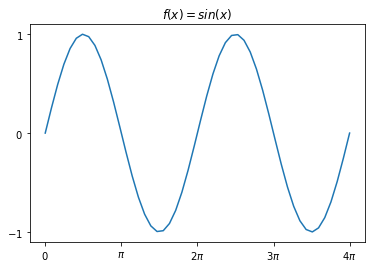

In [5]:
plot_sinx(x, f)

## What does the following formula stand for

$$S(x) = \frac{1}{1 + e^{-x}}$$

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot_sigmoid(x_arr, y_arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y_arr)
    ax.set_yticks([0, 0.5, 1])
    ax.set_xticks([])
    ax.set_title('$S(x) = 1/(1+e^{-x})$')
    plt.show()

x = np.linspace(-10, 10)
S = sigmoid(x)

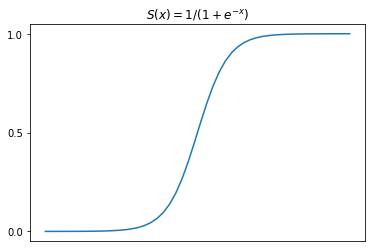

In [7]:
plot_sigmoid(x, S)

## Visualization also plays a key role in machine learning

## Machine learning engineer uses line plot to visualize cost function

In [8]:
def plot_logistic_cost_function(x_arr):
    y0 = -np.log(1-x_arr)
    y1 = -np.log(x_arr)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y0, label="$-log(h_{\\theta}(x))$ if y = 0")
    ax.plot(x_arr, y1, label="$-log(1 - h_{\\theta}(x))$ if y = 1")
    ax.legend()
    ax.set_title("Logistic Regression Cost Function")
    ax.set_xlabel("$h_{\\theta}(x)$")
    ax.set_ylabel("Cost")
    plt.show()
    
x = np.linspace(0.0001, 0.9999, 1000)

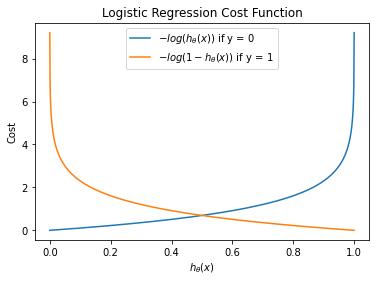

In [9]:
plot_logistic_cost_function(x)

## Machine learning engineer uses surface plot to visualize gradients

![Imgur](https://i.imgur.com/qMsNwXx.png)

Source: [Coursera | Machine Learning](https://www.coursera.org/learn/machine-learning)

## Machine learning engineer also uses contour plot to visualize gradients

![Imgur](https://i.imgur.com/qmeRAdf.png)

Source: [Coursera | Machine Learning](https://www.coursera.org/learn/machine-learning)

## Machine learning engineer uses scatter plot and contour plot to visualize decision boundary

Source: <https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py>

In [10]:
from itertools import product
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

def plot_multiple_decision_boundary():
    # Loading some example data
    iris = datasets.load_iris()
    X = iris.data[:, [0, 2]]
    y = iris.target

    # Training classifiers
    clf1 = DecisionTreeClassifier(max_depth=4)
    clf2 = KNeighborsClassifier(n_neighbors=7)
    clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
    eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                        ('svc', clf3)],
                            voting='soft', weights=[2, 1, 2])

    clf1.fit(X, y)
    clf2.fit(X, y)
    clf3.fit(X, y)
    eclf.fit(X, y)

    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

    for idx, clf, tt in zip(product([0, 1], [0, 1]),
                            [clf1, clf2, clf3, eclf],
                            ['Decision Tree (depth=4)', 'KNN (k=7)',
                             'Kernel SVM', 'Soft Voting']):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                      s=20, edgecolor='k')
        axarr[idx[0], idx[1]].set_title(tt)

    plt.show()

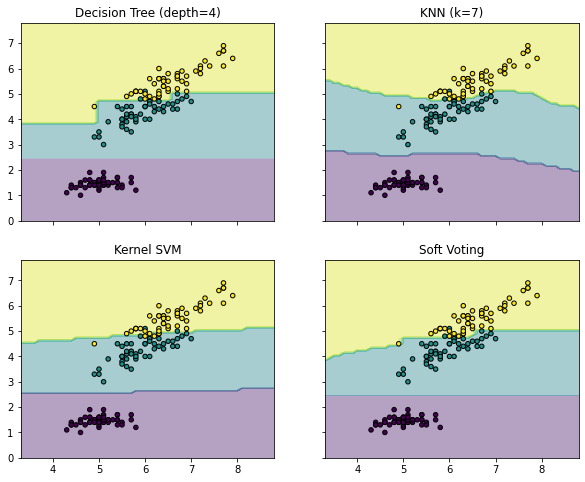

In [11]:
plot_multiple_decision_boundary()

## The 2 most influential visualizations of ALL TIME

1. [Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Flow_map#/media/File:Minard.png)
2. [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo)

## [Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Flow_map#/media/File:Minard.png)

In 1812, Napoleon marched to Moscow. 98% of his soldiers died. The simple but fascinating temperature line below the viz shows how cold ultimately defeated Napoleon’s army.

![Imgur](https://i.imgur.com/DcuAxgz.png?1)

## [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo)

A 2007 TED talk for the Swedish scientist shared his passion with the world. It shows the relationship between wealth and health.

![Imgur](https://i.imgur.com/IiDf3I8.png?1)

>The simple graph has brought more information to the data analyst’s mind than any other device.
>
>[John Tukey](https://en.wikipedia.org/wiki/John_Tukey)

## [John Tukey](https://en.wikipedia.org/wiki/John_Tukey) is an American mathematician best known for development of box plot.

In [12]:
gapminder = pd.read_csv("https://python4ds.s3-ap-northeast-1.amazonaws.com/gapminder.csv")

def plot_box_plot(df):
    continents = df["continent"].unique()
    list_of_arr = [df[df["continent"] == cont]["gdpPercap"].values for cont in continents]
    fig = plt.figure()
    ax = plt.axes()
    ax.boxplot(list_of_arr)
    ax.set_ylim(0, 60000)
    ax.set_xticklabels(continents)
    ax.set_title("A Box Plot of Gapminder's GDP Per Capita")
    ax.set_ylabel("GDP Per Capita")
    plt.show()

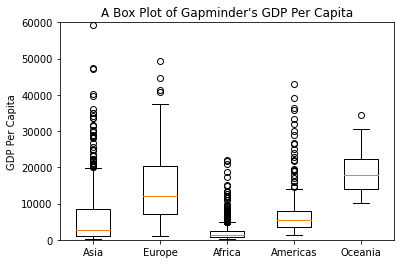

In [13]:
plot_box_plot(gapminder)

## What is modern data science

> Modern data science is a huge field, it invovles applications and tools like importing, tidying, transformation, visualization, modeling, and communication. Surrounding all these is programming.

![Imgur](https://i.imgur.com/din6Ig6.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

![Imgur](https://i.imgur.com/vbczHMF.jpg)

Source: <https://twitter.com/cdixon/status/428914681911070720/photo/1>

![Imgur](https://i.imgur.com/6u4tw97.png)

Source: <http://drewconway.com/>

## Meet my favorite data scientist on TV show: Chandler Bing

![](https://media.giphy.com/media/fA81FF4mdE6lgeoJwb/giphy.gif)

Source: <https://gph.is/g/4DA0wGO>

![Imgur](https://i.imgur.com/QhZ2FDY.png?2)

Source: <https://www.warnerbros.com/tv/friends/>

![Imgur](https://i.imgur.com/iZwdP9t.png?5)

Source: <https://www.warnerbros.com/tv/friends/>

## Tools you're gonna use in this course

## A little bit of ...

- Tableau for **visualization** and **communication**
- SQL for **importing**
- Python for **importing**, **tidying**, and **transformation**

## In fact, Python(or R, Julia, ...etc.) is capable to tackle everything

![Imgur](https://i.imgur.com/din6Ig6.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## What is Tableau

> Tableau is a tool that was designed to enable you to perform complex data analysis tasks and create powerful, interactive visualizations that communicate the analysis.

Source: <https://www.tableau.com/>

## What is SQL

> Structured Query Language is a descriptive computer language designed for updating, retrieving, and calculating data in table-based databases.

Source: <https://developer.mozilla.org/>

## What is Python

> Python is a clear and powerful object-oriented programming language.

Source: <https://www.python.org/>

## Why Tableau, SQL, and Python?

## Let's explore 3 questions in [2020 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2020)

- What programming languages do you use on a regular basis? (Select all that apply)
- What programming language would you recommend an aspiring data scientist to learn first?
- Which of the following business intelligence tools do you use most often?

## What is [Kaggle](https://kaggle.com/)

> A subsidiary of Google, is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

Source: <https://en.wikipedia.org/wiki/Kaggle>

In [14]:
from ks2020 import KaggleSurvey2020

csv_file = "https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2020/kaggle_survey_2020_responses.csv"
ks = KaggleSurvey2020(csv_file)

What programming languages do you use on a regular basis? (Select all that apply)
Too many categories, only showing the top 10.


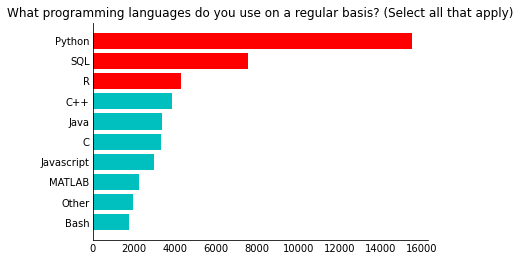

In [15]:
ks.plot_summary('Q7')

What programming language would you recommend an aspiring data scientist to learn first?
Too many categories, only showing the top 10.


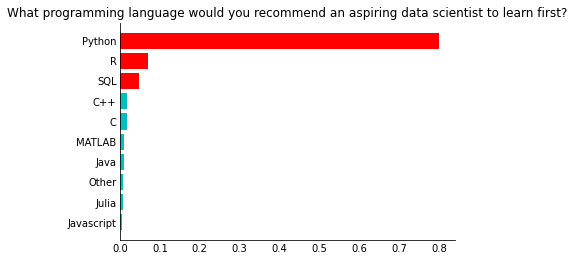

In [16]:
ks.plot_summary('Q8')

Which of the following business intelligence tools do you use most often?
Too many categories, only showing the top 10.


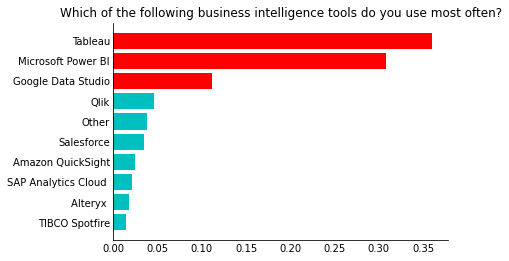

In [17]:
ks.plot_summary('Q32')

## The plots speak loud and clear.